<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Задание" data-toc-modified-id="Задание-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Задание</a></span></li><li><span><a href="#Задание" data-toc-modified-id="Задание-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Задание</a></span></li><li><span><a href="#Выполнение-задания" data-toc-modified-id="Выполнение-задания-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выполнение задания</a></span><ul class="toc-item"><li><span><a href="#Задание-1" data-toc-modified-id="Задание-1-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Задание 1</a></span></li></ul></li><li><span><a href="#Построение-графиков" data-toc-modified-id="Построение-графиков-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Построение графиков</a></span></li><li><span><a href="#Эксперименты" data-toc-modified-id="Эксперименты-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Эксперименты</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Дальше-пытался-подгрузить-с-официальной-странички-GitHub-названия-регионов-с-номерами,-и-соединить-по-полю-регион." data-toc-modified-id="Дальше-пытался-подгрузить-с-официальной-странички-GitHub-названия-регионов-с-номерами,-и-соединить-по-полю-регион.-5.0.0.1"><span class="toc-item-num">5.0.0.1&nbsp;&nbsp;</span>Дальше пытался подгрузить с официальной странички GitHub названия регионов с номерами, и соединить по полю регион.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#И-только-вот-на-этом-моменте-нашёл,-что-там-были-названия-регионов..." data-toc-modified-id="И-только-вот-на-этом-моменте-нашёл,-что-там-были-названия-регионов...-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>И только вот на этом моменте нашёл, что там были названия регионов...</a></span></li><li><span><a href="#А-дальше-выполнил-ООП..." data-toc-modified-id="А-дальше-выполнил-ООП...-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>А дальше выполнил ООП...</a></span></li></ul></div>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ds-reboot/python-first-part/blob/main/notebooks/hometasks/Task1_dmrf.ipynb)

# Задание
* Собрать информацию о всех строящихся объектах на сайте "наш.дом.рф"
* Cохранить ее в pandas dataframe
* Cохранить pandas dataframe в excel
* Cохранить pandas dataframe в pickle
* Cохранить pandas dataframe в БД

# Задание 
* Написать скрипт, который скачивает фотографии всех строящихся объектов с сайта "наш.дом.рф"


# Выполнение задания

## Задание 1

In [301]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import tqdm
import sqlite3
from pylab import rcParams

In [3]:
class DomIdLoader:
    def __init__(self):
        self.offset_ = 1
        self.limit_ = 1000
        self.objids = []
        self.all_data_domrf = []
        self.page = ''
        self.data_df = None


    def get_objId(self):
        for _ in range(20):
            try:
                url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/kn/object?offset={self.offset_}&limit={self.limit_}&sortField=devId.devShortCleanNm&sortType=asc&objStatus=0'
                res = (requests.get(url))
                objects_data = (res.json())
                objects_data.get('data').get('list')
                objects_list = objects_data.get('data').get('list')
                self.objids += [x.get('objId') for x in objects_list]
                self.offset_ += 1000
                self.limit_ += 1000
            except Exception as inst:
                print('inst')
                self.objids = set(self.objids)
        self.objids = list(self.objids)
        print("ID объектов с сайта ДОМ РФ собраны!")

    def get_data(self):
        for i in (range(len(self.objids))):
            url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/object/{self.objids[i]}'
            res = requests.get(url)
            res = res.json()
            all_data = res.get('data')
            if 'developer' in all_data:
                all_data.update(all_data['developer'])
                all_data.pop('developer')
            if 'quartography' in all_data:
                all_data.update(all_data['quartography'])
                all_data.pop('quartography')
            self.all_data_domrf.append(all_data)
        print("Выгружены данные по объектам")

    def make_data_dataframe(self):
        print("Создан DataFrame")
        return pd.DataFrame(self.all_data_domrf)
        
    
    def get_df_with_data(self):
        self.get_objId()
        self.get_data()
        self.make_data_dataframe()
        self.data_df = self.make_data_dataframe()
        return self.data_df

In [4]:
dom_id_loader = DomIdLoader()
data = dom_id_loader.get_df_with_data()

ID объектов с сайта ДОМ РФ собраны!
Выгружены данные по объектам
Создан DataFrame
Создан DataFrame


In [5]:
len(data)

34476

In [6]:
class Saver:
    def __init__(self, data):
        self.data = data
        self.file_name = 'Data'
        self.conn = sqlite3.connect('skills_database')        

    def save_csv(self):
        self.data.to_csv(f'{self.file_name}.csv', index=False)
        print(f'Dataset сохранён в файл {self.file_name}.csv')

    def save_xl(self):
        self.data.to_excel(f'{self.file_name}.xlsx', index=False)
        print(f'Dataset сохранён в файл {self.file_name}.xlsx')

    def save_sql(self):
        self.data.to_sql(f'{self.file_name}', self.conn, if_exists='replace', index = False)
        self.conn.commit()
        self.conn.close()
        print(f'Dataset сохранён в файл {self.file_name}.csv')
        
    def save_pcl(self):
        self.data.to_pickle(f'{self.file_name}.pkl')
        print(f'Dataset сохранён в файл {self.file_name}.pkl')

In [7]:
Saver_ = Saver(data)
Saver_.save_csv()

Dataset сохранён в файл Data.csv


In [8]:
df = pd.read_csv('Data.csv')

###### В какую-то из попыток получилось выгрузить и сохранить всё

In [302]:
len(df)

34476

In [ ]:
class PhotoLoader:
    def __init__(self):
        self.offset_ = 1
        self.limit_ = 10
        self.all_photo_domrf = []
        self.objids = []
        self.page = ''
        self.name_photo = 0

    def get_objId(self):
        url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/kn/object?offset={self.offset_}&limit={self.limit_}&sortField=devId.devShortCleanNm&sortType=asc&objStatus=0'
        res = (requests.get(url))
        objects_data = (res.json())
        objects_data.get('data').get('list')
        objects_list = objects_data.get('data').get('list')
        objids = [x.get('objId') for x in objects_list]
        self.objids.extend(objids)
        print("ID объектов с сайта ДОМ РФ собраны!")

    def get_photo_url(self):
        for i in (range(len(self.objids))):
            url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/object/{self.objids[i]}'
            res = requests.get(url)
            res = res.json()
            all_photo = res.get('data').get('photoRenderDTO')
            for i in all_photo:
                self.all_photo_domrf.append(i.get('objRenderPhotoUrl'))
        print("Выгружены url фотографий в list")
        
    def get_photo(self):
        for img in self.all_photo_domrf:
            self.name_photo += 1
            p = requests.get(img)
            out = open(f"{self.name_photo}_photo.jpg", "wb")
            out.write(p.content)
            out.close()
        print("Фотографии выгружены")

    def get_all_photo(self):
        self.get_objId()
        self.get_photo_url()
        self.get_photo()

In [ ]:
photoLoader = PhotoLoader()
photo = photoLoader.get_all_photo()

# Построение графиков



In [469]:
class Visualizer:
    def __init__(self,data):
        self.data = data
        self.data['Year_ready'] = [int(i[:4]) for i in self.data['objReady100PercDt']]
        self.data['avg_sqr_kv'] = self.data['objSquareLiving'] // self.data['objElemLivingCnt']

    def make_boxplot(self, ):
        sns.catplot(
            x='wallMaterialShortDesc', 
            y='objPriceAvg', 
            data=self.data, 
            kind='boxen', 
            height=6, 
            aspect=2); 
        plt.title('График зависимости средней цены м2 от материала строительства', fontsize=16, fontweight='bold', color='DarkRed')
        plt.xlabel(' материал строительства', fontsize=16, color='DarkRed')
        plt.ylabel('Средняя цена, сотен тысяч руб.', fontsize=16, color='DarkRed')
        plt.show()

    def make_heatmap(self):
        home = self.data[self.data['objPriceAvg'] > 0].groupby(["Year_ready", "transportDistIndexValue"]).objPriceAvg.mean()
        home = home.reset_index()
        home = home.pivot('Year_ready','transportDistIndexValue', 'objPriceAvg')
        home = home.sort_values('Year_ready')
        fig, (ax1) = plt.subplots(1,1, figsize=(15,5))
        sns.heatmap(
            home, 
            annot=True, 
            fmt='.0f',
            linewidths=.5, 
            cmap="YlGnBu",
            cbar_kws={"label": "Стоимость квадратного метра"})
        ax1.set(title='Тепловая карта зависимости стоимости м2 от года и транспортной инфраструктуры', 
                ylabel='Год окончания строительства',
                xlabel='Индекс транспортной инфраструктуры'
               )
        plt.show()
    
    
    
    def reserch_avg_price(self):
        df2 = self.data[self.data['objPriceAvg'] > 0]
        x1 = df2[['objLkFinishTypeDesc', 'objPriceAvg']].groupby('objLkFinishTypeDesc').mean('objPriceAvg')
        x2 = df2[['wallMaterialShortDesc', 'objPriceAvg']].groupby('wallMaterialShortDesc').mean('objPriceAvg')
        x3 = df2[['floorMin', 'objPriceAvg']].groupby('floorMin').mean('objPriceAvg')
        x4 = df2[['floorMax', 'objPriceAvg']].groupby('floorMax').mean('objPriceAvg')
        x5 = df2[['objInfrstrBicycleLaneFlg', 'objPriceAvg']].groupby('objInfrstrBicycleLaneFlg').mean('objPriceAvg')
        x6 = df2[['objInfrstrSportGroundCnt', 'objPriceAvg']].groupby('objInfrstrSportGroundCnt').mean('objPriceAvg')
        x7 = df2[['objInfrstrTrashAreaCnt', 'objPriceAvg']].groupby('objInfrstrTrashAreaCnt').mean('objPriceAvg')
        x8 = df2[['objInfrstrPlaygrndCnt', 'objPriceAvg']].groupby('objInfrstrPlaygrndCnt').mean('objPriceAvg')
        x9 = df2[['nonlivFirstFloor', 'objPriceAvg']].groupby('nonlivFirstFloor').mean('objPriceAvg')
        x10 = df2[['objEnergyEffShortDesc', 'objPriceAvg']].groupby('objEnergyEffShortDesc').mean('objPriceAvg')
        x11 = df2[['infrastructureIndexValue', 'objPriceAvg']].groupby('infrastructureIndexValue').mean('objPriceAvg')
        x12 = df2[['objGreenHouseFlg', 'objPriceAvg']].groupby('objGreenHouseFlg').mean('objPriceAvg')
        x13 = df2[['transportDistIndexValue', 'objPriceAvg']].groupby('transportDistIndexValue').mean('objPriceAvg')
        x14 = df2[['airQualityIndexValue', 'objPriceAvg']].groupby('airQualityIndexValue').mean('objPriceAvg')
        a = [(x1, 'График зависимости средней цены м2 от типа отделки', 'objLkFinishTypeDesc', 'тип отделки'), 
             (x2, 'График зависимости средней цены м2 от материала строительства', 'wallMaterialShortDesc', 'материал строительства'), 
             (x3, 'График зависимости средней цены м2 от этажа, на котором расположен объект', 'floorMin', 'этаж'), 
             (x4, 'График зависимости средней цены м2 от количества этажей в здании', 'floorMax', 'этаж'), 
             (x5, 'График зависимости средней цены м2 от инфраструктуры для велосипедов', 'objInfrstrBicycleLaneFlg', '1 - есть, 0 - нет'), 
             (x6, 'График зависимости средней цены м2 от количества спортивных площадок', 'objInfrstrSportGroundCnt', 'штук'), 
             (x7, 'График зависимости средней цены м2 от количества мусорных площадок', 'objInfrstrTrashAreaCnt', 'штук'), 
             (x8, 'График зависимости средней цены м2 от количества игровых площадок', 'objInfrstrPlaygrndCnt', 'штук'),
             (x9, 'График зависимости средней цены м2 от жилого первого этажа', 'nonlivFirstFloor', '1 - не жилой, 0 - жилой'), 
             (x10, 'График зависимости средней цены м2 от категории энергоэффективности', 'objEnergyEffShortDesc', 'энергоэффективность'), 
             (x11, 'График зависимости средней цены м2 от индекса инфраструктуры', 'infrastructureIndexValue', 'индекс инфраструктуры'), 
             (x12, 'График зависимости средней цены м2 от категории экологичности', 'objGreenHouseFlg', '1 - экологичный, 0 - не экологичный'), 
             (x13, 'График зависимости средней цены м2 от индекса транспортной инфраструктуры', 'transportDistIndexValue', 'индекс транспортной инфраструктуры'), 
             (x14, 'График зависимости средней цены м2 от индекса качества воздуха', 'airQualityIndexValue', 'индекс качества воздуха')]
        for i in a:
            rcParams['figure.figsize'] = 10, 15
            i[0].sort_values(i[2], ascending=False).plot(kind='barh')
            plt.title(i[1], fontsize=16, fontweight='bold', color='DarkRed')
            plt.xlabel(' Средняя цена руб.', fontsize=16, color='DarkRed')
            plt.ylabel(i[3], fontsize=16, color='DarkRed')
            plt.show()
        
    def reserch_floor(self):
        x = self.data[['id', 'floorMin']].groupby('floorMin').count()
        x2 = self.data[['id', 'floorMax']].groupby('floorMax').count()
        rcParams['figure.figsize'] = 10,15
        x.sort_values('floorMin', ascending=False).plot(kind='barh')
        plt.title('Количество продаваемой недвижимости', fontsize=16, fontweight='bold', color='DarkRed')
        plt.ylabel('Этаж, на котором расположена недвижимость', fontsize=16, fontweight='bold', color='DarkRed')
        x2.sort_values('floorMax', ascending=False).plot(kind='barh')
        plt.ylabel('Количество этажей в доме', fontsize=16, fontweight='bold', color='DarkRed')
        plt.title('Количество продаваемой недвижимости', fontsize=16, fontweight='bold', color='DarkRed')
        plt.show()
    
    def reserch_region(self):
        a = self.data[['id', 'regRegionDesc']].groupby('regRegionDesc').count()
        rcParams['figure.figsize'] = 10,15
        a.sort_values('id', ascending=True).plot(kind='barh')
        plt.title('Количество продаваемой недвижимости', fontsize=16, fontweight='bold', color='DarkRed')
        plt.xlabel('штук')
        plt.ylabel('Номер региона')
        x = self.data[['regRegionDesc', 'objPriceAvg']][self.data['objPriceAvg'] > 0].groupby('regRegionDesc').mean('objPriceAvg')
        x2 = self.data[['regRegionDesc', 'avg_sqr_kv']][self.data['avg_sqr_kv'] > 0].groupby('regRegionDesc').mean('avg_sqr_kv')
        x.sort_values('objPriceAvg', ascending=True).plot(kind='barh')
        plt.title('Средняя стоимость одного м2 недвижимости в зависимости от региона', fontsize=16, fontweight='bold', color='DarkRed')
        plt.xlabel('руб.', fontsize=16, color='DarkRed')
        plt.ylabel('Регион', fontsize=16, fontweight='bold', color='DarkRed')
        x2.sort_values('avg_sqr_kv', ascending=True).plot(kind='barh')
        plt.title('Средняя площадь одного объекта строящейся недвижимости в зависимости от региона', fontsize=16, fontweight='bold', color='DarkRed')
        plt.xlabel('м2', fontsize=16, color='DarkRed')
        plt.ylabel('Регион', fontsize=16, fontweight='bold', color='DarkRed')
        plt.show()
        
    
    def make_map(self):
        data2 = self.data[self.data['objLkLatitude'] > ''].copy()
        data2['objLkLatitude2'] = [int(i.split('.')[0]) for i in data[data['objLkLatitude'] > '']['objLkLatitude']]
        data2['objLkLongitude2'] = [int(i.split('.')[0]) for i in data[data['objLkLongitude'] > '']['objLkLongitude']]
        rcParams['figure.figsize'] = 15, 10
        plt.scatter(data2['objLkLongitude2'], 
            data2['objLkLatitude2'])
        plt.title('Карта продаваемых объектов', size=10, color='g')
        plt.show()

In [467]:
visualizer = Visualizer(data)

In [ ]:
visualizer.make_boxplot()

In [ ]:
visualizer.make_heatmap()

In [ ]:
visualizer.reserch_region()

In [ ]:
visualizer.reserch_avg_price()

In [ ]:
visualizer.make_map()

# Эксперименты

In [65]:
import matplotlib.pyplot as plt

In [11]:
df.info

<bound method DataFrame.info of           id  hobjId    pdId  region  \
0      13383   39024   28105      72   
1      13398   37165   28141      72   
2      13397   37201   28141      72   
3      13399   34754   28141      72   
4      36912  117248  337586      26   
...      ...     ...     ...     ...   
34471  28071   19791   99284      50   
34472  28070   19242   99487      50   
34473  28073   19245   96446      50   
34474  44447  125044  475093      76   
34475  45321  125942  516648      32   

                                                 address  floorMin  floorMax  \
0                                               г Тюмень         4        20   
1                        г Тюмень, ул Профсоюзная, д. 56         7        10   
2                        г Тюмень, ул Профсоюзная, д. 56         6        12   
3                        г Тюмень, ул Профсоюзная, д. 56         1         1   
4      г Ставрополь, ул Шпаковская, Доваторцев, д. 10...         2        10   
...    

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34476 entries, 0 to 34475
Data columns (total 99 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            34476 non-null  int64  
 1   hobjId                        34476 non-null  int64  
 2   pdId                          34476 non-null  int64  
 3   region                        34476 non-null  int64  
 4   address                       34447 non-null  object 
 5   floorMin                      34476 non-null  int64  
 6   floorMax                      34476 non-null  int64  
 7   objElemLivingCnt              34476 non-null  int64  
 8   objReady100PercDt             34476 non-null  object 
 9   wallMaterialShortDesc         34476 non-null  object 
 10  objLkFinishTypeDesc           34476 non-null  object 
 11  objLkFreePlanDesc             34439 non-null  object 
 12  objElemParkingCnt             34476 non-null  int64  
 13  o

In [34]:
df.columns

Index(['id', 'hobjId', 'pdId', 'region', 'address', 'floorMin', 'floorMax',
       'objElemLivingCnt', 'objReady100PercDt', 'wallMaterialShortDesc',
       'objLkFinishTypeDesc', 'objLkFreePlanDesc', 'objElemParkingCnt',
       'objSquareLiving', 'rpdNum', 'rpdPdfLink', 'rpdIssueDttm',
       'objLkLatitude', 'objLkLongitude', 'objCompensFundFlg', 'objProblemFlg',
       'objLkClassDesc', 'loadDttm', 'photoRenderDTO', 'objGuarantyEscrowFlg',
       'objectType', 'miniUrl', 'residentialBuildings', 'newBuildingId',
       'objFloorCnt', 'objFlatCnt', 'objFlatSq', 'objNonlivElemCnt',
       'objStatus', 'isAvailableWantLiveHere', 'objTransferPlanDt',
       'objLivCeilingHeight', 'objInfrstrBicycleLaneFlg',
       'objInfrstrPlaygrndCnt', 'objInfrstrSportGroundCnt',
       'objInfrstrTrashAreaCnt', 'objInfrstrObjPrkngCnt',
       'objInfrstrNotObjPrkngCnt', 'objInfrstrRampFlg',
       'objInfrstrCurbLoweringFlg', 'objElevatorWheelchairCnt',
       'objElevatorPassengerCnt', 'objElevatorCa

In [63]:
df[['floorMin', 'floorMax']]

,floorMin,floorMax
0,4,20
1,7,10
2,6,12
3,1,1
4,2,10
...,...,...
34471,26,26
34472,2,26
34473,26,26
34474,6,6


In [48]:
df[['id', 'region']]

,id,region
0,13383,72
1,13398,72
2,13397,72
3,13399,72
4,36912,26
...,...,...
34471,28071,50
34472,28070,50
34473,28073,50
34474,44447,76


#### Дальше пытался подгрузить с официальной странички GitHub названия регионов с номерами, и соединить по полю регион.

In [259]:
df2 = pd.read_excel('Книга1.xlsx')

In [260]:
df2['code'] = [int(i[3:]) for i in df2['geoname_code']]

In [261]:
df2[:30]#[30:70]

,name_with_type,federal_district,geoname_code,code
0,Респ Адыгея,Южный,RU.01,1
1,Респ Башкортостан,Приволжский,RU.08,8
2,Респ Бурятия,Дальневосточный,RU.11,11
3,Респ Алтай,Сибирский,RU.03,3
4,Респ Дагестан,Северо-Кавказский,RU.17,17
5,Респ Ингушетия,Северо-Кавказский,RU.19,19
6,Кабардино-Балкарская Респ,Северо-Кавказский,RU.22,22
7,Респ Калмыкия,Южный,RU.24,24
8,Карачаево-Черкесская Респ,Северо-Кавказский,RU.27,27
9,Респ Карелия,Северо-Западный,RU.28,28


In [262]:
df3 = df.merge(df2, 'left', left_on='region', right_on='code')

In [263]:
df3

,id,hobjId,pdId,region,address,floorMin,floorMax,objElemLivingCnt,objReady100PercDt,wallMaterialShortDesc,...,bankruptStage,orgBankruptMsgDttm,complexShortNm,greenAreaIndexValue,Year_ready,avg_sqr_kv,name_with_type,federal_district,geoname_code,code
0,13383,39024,28105,72,г Тюмень,4,20,68,2023-03-31,Другое,...,NaN,NaN,NaN,NaN,2023,92.0,Тамбовская обл,Центральный,RU.72,72.0
1,13398,37165,28141,72,"г Тюмень, ул Профсоюзная, д. 56",7,10,43,2024-12-31,Другое,...,NaN,NaN,NaN,NaN,2024,111.0,Тамбовская обл,Центральный,RU.72,72.0
2,13397,37201,28141,72,"г Тюмень, ул Профсоюзная, д. 56",6,12,65,2024-12-31,Другое,...,NaN,NaN,NaN,NaN,2024,96.0,Тамбовская обл,Центральный,RU.72,72.0
3,13399,34754,28141,72,"г Тюмень, ул Профсоюзная, д. 56",1,1,0,2024-12-31,Другое,...,NaN,NaN,NaN,NaN,2024,NaN,Тамбовская обл,Центральный,RU.72,72.0
4,36912,117248,337586,26,"г Ставрополь, ул Шпаковская, Доваторцев, д. 10...",2,10,104,2022-12-31,Монолит-кирпич,...,NaN,NaN,NaN,NaN,2022,79.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34553,28071,19791,99284,50,"г Котельники, район мкр.Ковровый, д.1-5, 24-29...",26,26,288,2024-06-30,Другое,...,NaN,NaN,NaN,NaN,2024,51.0,Ненецкий АО,Северо-Западный,RU.50,50.0
34554,28070,19242,99487,50,"г Котельники, район мкр.Ковровый, д.1-5, 24-29...",2,26,768,2025-03-31,Другое,...,NaN,NaN,NaN,NaN,2025,38.0,Ненецкий АО,Северо-Западный,RU.50,50.0
34555,28073,19245,96446,50,"г Котельники, район мкр.Ковровый, д.1-5, 24-29...",26,26,312,2024-06-30,Другое,...,NaN,NaN,NaN,NaN,2024,47.0,Ненецкий АО,Северо-Западный,RU.50,50.0
34556,44447,125044,475093,76,"г Ярославль, Фрунзенский район, территория в р...",6,6,127,2022-12-31,Кирпич,...,NaN,NaN,NaN,NaN,2022,53.0,Тульская обл,Центральный,RU.76,76.0


In [265]:
a = df3[['id', 'name_with_type']].groupby('name_with_type').count()

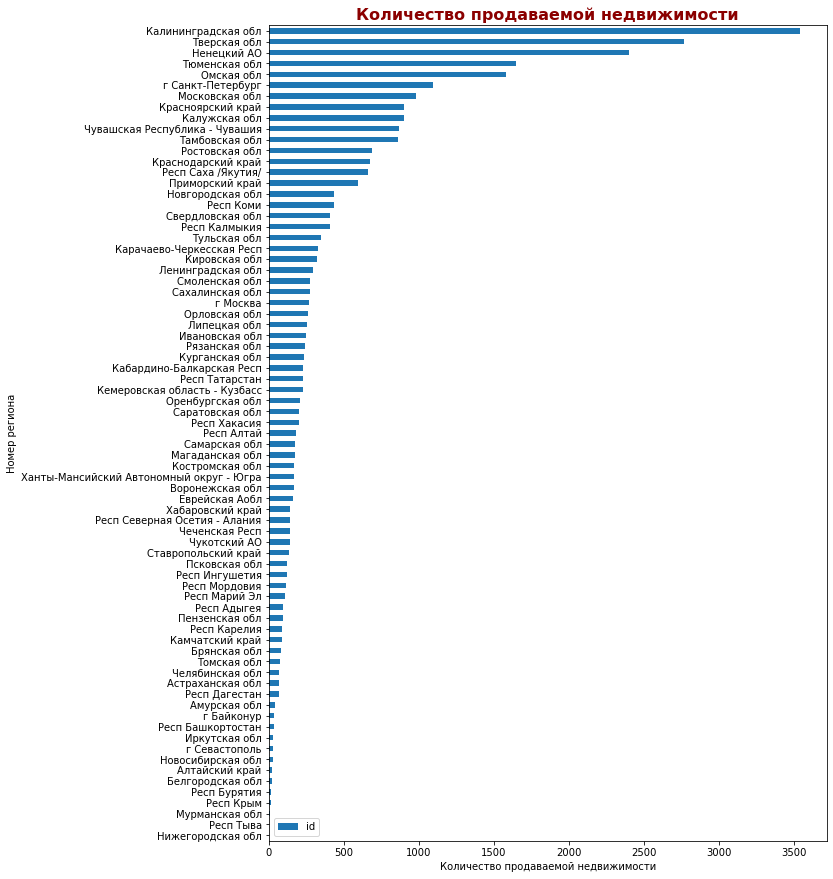

In [266]:
rcParams['figure.figsize'] = 10,15
a.sort_values('id', ascending=True).plot(kind='barh')
plt.title('Количество продаваемой недвижимости', fontsize=16, fontweight='bold', color='DarkRed')
plt.xlabel('Количество продаваемой недвижимости')
plt.ylabel('Номер региона')
plt.show()

###### Но понял, что на этом сайте номер региона != официальному номеру региона.

In [273]:
a = df[['id', 'region']].groupby('region').count()

In [ ]:
class Visualizer:
    def __init__(self,data):
        self.data = data

    def make_chart_region(self):
        df = self.data[['id', 'region']].groupby('region').count()
        rcParams['figure.figsize'] = 10,15
        df.sort_values('id', ascending=True).plot(kind='barh')
        plt.title('Количество продаваемой недвижимости', fontsize=16, fontweight='bold', color='DarkRed')
        plt.xlabel('Количество продаваемой недвижимости')
        plt.ylabel('Номер региона')
        x = self.data[['region', 'objPriceAvg']][df['objPriceAvg'] > 0].groupby('region').mean('objPriceAvg')
        x2 = self.data[['region', 'avg_sqr_kv']][df['avg_sqr_kv'] > 0].groupby('region').mean('avg_sqr_kv')
        x.sort_values('objPriceAvg', ascending=True).plot(kind='barh')
        plt.title('Средняя стоимость одного м2 недвижимости в зависимости от региона', fontsize=16, fontweight='bold', color='DarkRed')
        plt.xlabel('руб.', fontsize=16, color='DarkRed')
        plt.ylabel('Регион', fontsize=16, fontweight='bold', color='DarkRed')
        x2.sort_values('avg_sqr_kv', ascending=True).plot(kind='barh')
        plt.title('Средняя площадь одного объекта строящейся недвижимости в зависимости от региона', fontsize=16, fontweight='bold', color='DarkRed')
        plt.xlabel('м2', fontsize=16, color='DarkRed')
        plt.ylabel('Регион', fontsize=16, fontweight='bold', color='DarkRed')
        plt.show()
        
        
        
        
        
    def make_chart_region(self):
        x = self.data[['id', 'floorMin']].groupby('floorMin').count()
        x2 = self.data[['id', 'floorMax']].groupby('floorMax').count()

        rcParams['figure.figsize'] = 10,15
        x.sort_values('floorMin', ascending=False).plot(kind='barh')
        plt.title('Количество продаваемой недвижимости', fontsize=16, fontweight='bold', color='DarkRed')
        plt.ylabel('Этаж, на котором расположена недвижимость', fontsize=16, fontweight='bold', color='DarkRed')
        x2.sort_values('floorMax', ascending=False).plot(kind='barh')
        plt.ylabel('Количество этажей в доме', fontsize=16, fontweight='bold', color='DarkRed')
        plt.title('Количество продаваемой недвижимости', fontsize=16, fontweight='bold', color='DarkRed')
        plt.show()

    def make_heatmap(self):
        df2 = self.data[self.data['objPriceAvg'] > 0]
        x1 = df2[['objLkFinishTypeDesc', 'objPriceAvg']].groupby('objLkFinishTypeDesc').mean('objPriceAvg')
        x2 = df2[['wallMaterialShortDesc', 'objPriceAvg']].groupby('wallMaterialShortDesc').mean('objPriceAvg')
        x3 = df2[['floorMin', 'objPriceAvg']].groupby('floorMin').mean('objPriceAvg')
        x4 = df2[['floorMax', 'objPriceAvg']].groupby('floorMax').mean('objPriceAvg')
        x5 = df2[['objInfrstrBicycleLaneFlg', 'objPriceAvg']].groupby('objInfrstrBicycleLaneFlg').mean('objPriceAvg')
        x6 = df2[['objInfrstrSportGroundCnt', 'objPriceAvg']].groupby('objInfrstrSportGroundCnt').mean('objPriceAvg')
        x7 = df2[['objInfrstrTrashAreaCnt', 'objPriceAvg']].groupby('objInfrstrTrashAreaCnt').mean('objPriceAvg')
        x8 = df2[['objInfrstrPlaygrndCnt', 'objPriceAvg']].groupby('objInfrstrPlaygrndCnt').mean('objPriceAvg')
        x9 = df2[['nonlivFirstFloor', 'objPriceAvg']].groupby('nonlivFirstFloor').mean('objPriceAvg')
        x10 = df2[['objEnergyEffShortDesc', 'objPriceAvg']].groupby('objEnergyEffShortDesc').mean('objPriceAvg')
        x11 = df2[['infrastructureIndexValue', 'objPriceAvg']].groupby('infrastructureIndexValue').mean('objPriceAvg')
        x12 = df2[['objGreenHouseFlg', 'objPriceAvg']].groupby('objGreenHouseFlg').mean('objPriceAvg')
        x13 = df2[['transportDistIndexValue', 'objPriceAvg']].groupby('transportDistIndexValue').mean('objPriceAvg')
        x14 = df2[['airQualityIndexValue', 'objPriceAvg']].groupby('airQualityIndexValue').mean('objPriceAvg')
        a = [(x1, 'objLkFinishTypeDesc', ''), (x2, 'wallMaterialShortDesc', ''), (x3, 'floorMin', ''), (x4, 'floorMax', ''), 
             (x5, 'objInfrstrBicycleLaneFlg', ''), (x6, 'objInfrstrSportGroundCnt', ''), (x7, 'objInfrstrTrashAreaCnt', ''), 
            (x8, 'objInfrstrPlaygrndCnt', ''), (x9, 'nonlivFirstFloor', ''), (x10, 'objEnergyEffShortDesc', ''), 
             (x11, 'infrastructureIndexValue', ''), (x12, 'objGreenHouseFlg', ''), (x13, 'transportDistIndexValue', ''), 
             (x14, 'airQualityIndexValue', '')]

        for i in a:
            rcParams['figure.figsize'] = 10, 15
            i[0].sort_values(i[1], ascending=False).plot(kind='barh')
            plt.title(i[1], fontsize=16, fontweight='bold', color='DarkRed')
            plt.xlabel('Класс жилья', fontsize=16, color='DarkRed')
            plt.ylabel('руб.', fontsize=16, fontweight='bold', color='DarkRed')
            plt.show()
            
    def make_heatmap(self):


Text(0, 0.5, 'Номер региона')

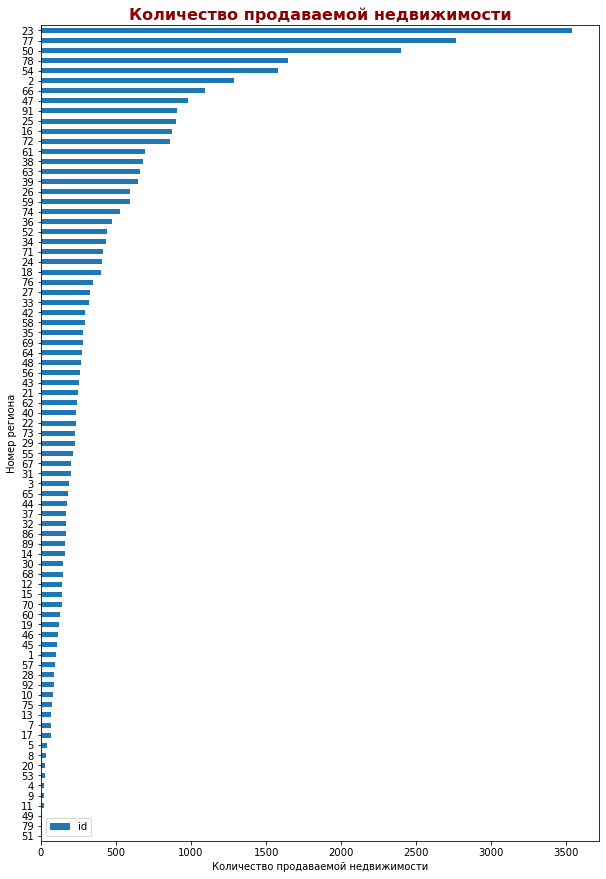

In [274]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,15
a.sort_values('id', ascending=True).plot(kind='barh')
plt.title('Количество продаваемой недвижимости', fontsize=16, fontweight='bold', color='DarkRed')
plt.xlabel('Количество продаваемой недвижимости')
plt.ylabel('Номер региона')
# Максимальное количество недвижимости продаётся в 23, 77 и 50 регионах

In [ ]:
a = df3[['id', 'region']].groupby('region').count()

##### Потом решил проверить, на каком этаже чаще всего продают квартиры. Головой итак понимал, что чаще всего будет первый этаж)))

In [103]:
df[['floorMin', 'floorMax']]

,floorMin,floorMax
0,4,20
1,7,10
2,6,12
3,1,1
4,2,10
...,...,...
34471,26,26
34472,2,26
34473,26,26
34474,6,6


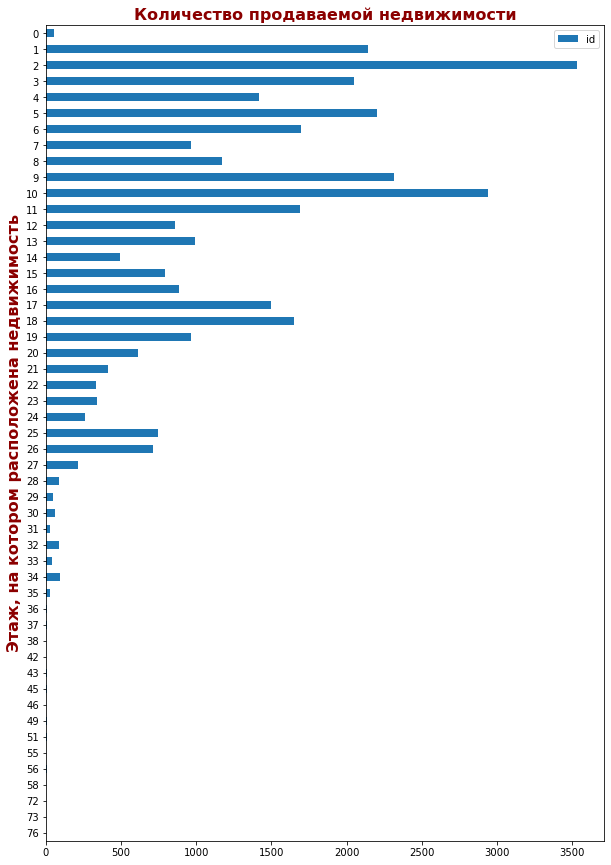

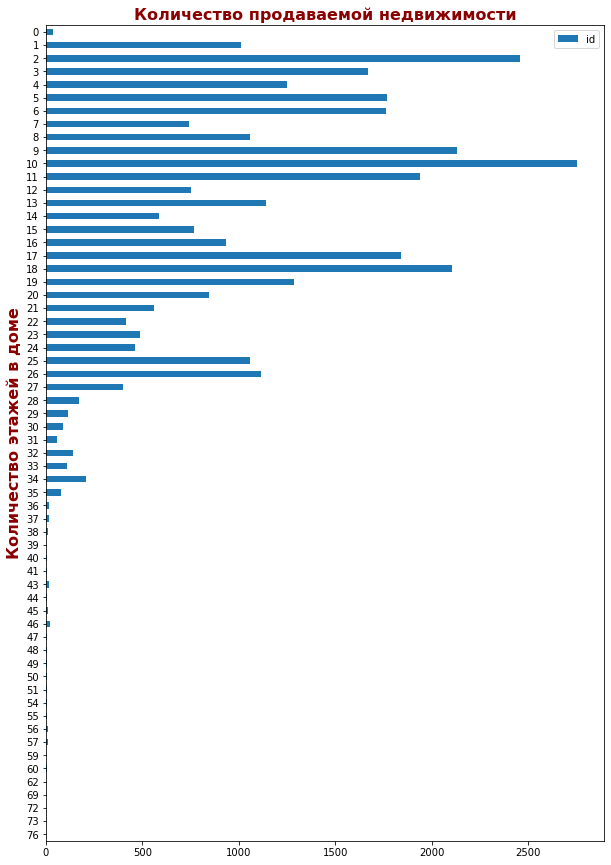

In [234]:
x = df[['id', 'floorMin']].groupby('floorMin').count()
x2 = df[['id', 'floorMax']].groupby('floorMax').count()

rcParams['figure.figsize'] = 10,15
x.sort_values('floorMin', ascending=False).plot(kind='barh')
plt.title('Количество продаваемой недвижимости', fontsize=16, fontweight='bold', color='DarkRed')
plt.ylabel('Этаж, на котором расположена недвижимость', fontsize=16, fontweight='bold', color='DarkRed')
x2.sort_values('floorMax', ascending=False).plot(kind='barh')
plt.ylabel('Количество этажей в доме', fontsize=16, fontweight='bold', color='DarkRed')
plt.title('Количество продаваемой недвижимости', fontsize=16, fontweight='bold', color='DarkRed')
plt.show()

##### Больше всего меня удивило то, что есть дома с 0 количеством этажей. Это как-то странно... их всего 38

In [141]:
df[df['floorMax'] == 0].count()

id                      38
hobjId                  38
pdId                    38
region                  38
address                 38
                        ..
airQualityIndexValue     0
bankruptStage            0
orgBankruptMsgDttm       0
complexShortNm           1
greenAreaIndexValue      0
Length: 99, dtype: int64

In [ ]:
x = df[['id', 'floorMin']].groupby('floorMin').count()
x2 = df[['id', 'floorMax']].groupby('floorMax').count()

rcParams['figure.figsize'] = 10,15
x.sort_values('floorMin', ascending=False).plot(kind='barh')
plt.title('Количество продаваемой недвижимости', fontsize=16, fontweight='bold', color='DarkRed')
plt.xlabel('Количество продаваемой недвижимости', fontsize=16, fontweight='bold', color='DarkRed')
plt.ylabel('Этаж, на котором расположена недвижимость', fontsize=16, fontweight='bold', color='DarkRed')
x2.sort_values('floorMax', ascending=False).plot(kind='barh')
plt.ylabel('Количество этажей в доме', fontsize=16, fontweight='bold', color='DarkRed')
fig.set_size_inches(3,6)

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34476 entries, 0 to 34475
Data columns (total 99 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            34476 non-null  int64  
 1   hobjId                        34476 non-null  int64  
 2   pdId                          34476 non-null  int64  
 3   region                        34476 non-null  int64  
 4   address                       34447 non-null  object 
 5   floorMin                      34476 non-null  int64  
 6   floorMax                      34476 non-null  int64  
 7   objElemLivingCnt              34476 non-null  int64  
 8   objReady100PercDt             34476 non-null  object 
 9   wallMaterialShortDesc         34476 non-null  object 
 10  objLkFinishTypeDesc           34476 non-null  object 
 11  objLkFreePlanDesc             34439 non-null  object 
 12  objElemParkingCnt             34476 non-null  int64  
 13  o

In [441]:
data2 = data[data['objLkLatitude'] > ''].copy()
data2['objLkLatitude2'] = [int(i.split('.')[0]) for i in data[data['objLkLatitude'] > '']['objLkLatitude']]
data2['objLkLongitude2'] = [int(i.split('.')[0]) for i in data[data['objLkLongitude'] > '']['objLkLongitude']]

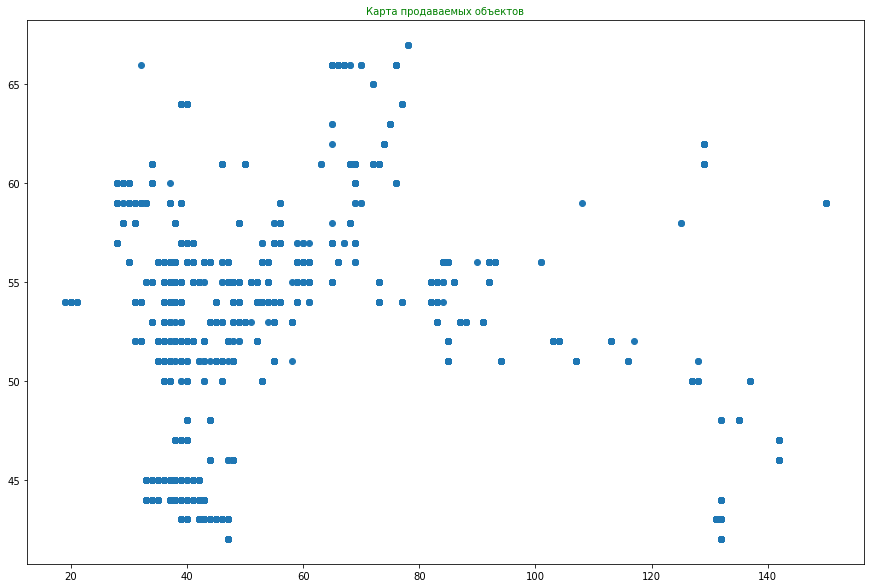

In [450]:
data2 = data[data['objLkLatitude'] > ''].copy()
data2 = data[data['objLkLatitude'] > ''].copy()
data2['objLkLatitude2'] = [int(i.split('.')[0]) for i in data[data['objLkLatitude'] > '']['objLkLatitude']]
data2['objLkLongitude2'] = [int(i.split('.')[0]) for i in data[data['objLkLongitude'] > '']['objLkLongitude']]
rcParams['figure.figsize'] = 15, 10
plt.scatter(data2['objLkLongitude2'], 
    data2['objLkLatitude2'])
plt.title('Карта продаваемых объектов', size=10, color='g')
plt.show()

In [293]:
df[df['metro'] > '']

,id,hobjId,pdId,region,address,floorMin,floorMax,objElemLivingCnt,objReady100PercDt,wallMaterialShortDesc,...,metro,transportDistIndex,transportDistIndexValue,airQualityIndexValue,bankruptStage,orgBankruptMsgDttm,complexShortNm,greenAreaIndexValue,Year_ready,avg_sqr_kv
13,30292,115751,120396,16,"г Казань, район Приволжский, улица Карбышева, ...",26,26,372,2023-03-31,Монолит-кирпич,...,"{'id': '49.276', 'name': 'Горки', 'line': 'Цен...",6 / 10,6.0,NaN,NaN,NaN,NaN,NaN,2023,80.0
25,20524,16650,49581,77,"г Москва, улица Адмирала Макарова, корпус 6, в...",34,34,396,2023-06-30,Другое,...,"{'id': '2.29', 'name': 'Водный стадион', 'line...",6 / 10,6.0,6.0,NaN,NaN,NaN,9.0,2023,51.0
35,21720,22953,54693,77,"г Москва, район Левобережный, шоссе Ленинградс...",22,22,204,2023-06-30,Монолит-кирпич,...,"{'id': '2.674', 'name': 'Беломорская', 'line':...",4 / 10,4.0,6.0,NaN,NaN,NaN,8.0,2023,81.0
36,45249,125859,530733,77,"г Москва, район Левобережный, ш Ленинградское,...",2,23,0,2025-09-30,Монолит-кирпич,...,"{'id': '2.674', 'name': 'Беломорская', 'line':...",5 / 10,5.0,NaN,NaN,NaN,NaN,8.0,2025,NaN
37,49511,130150,668440,54,"г Новосибирск, улица Лескова, литера 0, корпус 0",4,4,0,2023-06-30,Монолит,...,"{'id': '52.298', 'name': 'Октябрьская', 'line'...",7 / 10,7.0,NaN,NaN,NaN,NaN,NaN,2023,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34469,28072,19761,96379,50,"г Котельники, район мкр.Ковровый, д.1-5, 24-29...",2,26,312,2024-06-30,Другое,...,"{'id': '7.508', 'name': 'Котельники', 'line': ...",NaN,NaN,7.0,NaN,NaN,NaN,NaN,2024,47.0
34470,28074,19770,96537,50,"г Котельники, район мкр.Ковровый, д.1-5, 24-29...",2,26,600,2023-06-30,Другое,...,"{'id': '7.508', 'name': 'Котельники', 'line': ...",NaN,NaN,8.0,NaN,NaN,NaN,NaN,2023,49.0
34471,28071,19791,99284,50,"г Котельники, район мкр.Ковровый, д.1-5, 24-29...",26,26,288,2024-06-30,Другое,...,"{'id': '7.508', 'name': 'Котельники', 'line': ...",NaN,NaN,8.0,NaN,NaN,NaN,NaN,2024,51.0
34472,28070,19242,99487,50,"г Котельники, район мкр.Ковровый, д.1-5, 24-29...",2,26,768,2025-03-31,Другое,...,"{'id': '7.508', 'name': 'Котельники', 'line': ...",NaN,NaN,7.0,NaN,NaN,NaN,NaN,2025,38.0


In [287]:
df[['objPriceAvg', 'metro', 'transportDistIndex', 'transportDistIndexValue', 'bankruptStage', 'fundGuarantyFlg', 'regRegionDesc']]

,objPriceAvg,metro,transportDistIndex,transportDistIndexValue,bankruptStage,fundGuarantyFlg,regRegionDesc
0,53109.0,NaN,NaN,NaN,NaN,1,Тюменская область
1,47886.0,NaN,NaN,NaN,NaN,1,Тюменская область
2,45523.0,NaN,NaN,NaN,NaN,1,Тюменская область
3,50768.0,NaN,NaN,NaN,NaN,1,Тюменская область
4,62703.0,NaN,NaN,NaN,NaN,0,Ставропольский край
...,...,...,...,...,...,...,...
34471,85604.0,"{'id': '7.508', 'name': 'Котельники', 'line': ...",NaN,NaN,NaN,1,Московская область
34472,85309.0,"{'id': '7.508', 'name': 'Котельники', 'line': ...",NaN,NaN,NaN,1,Московская область
34473,85634.0,"{'id': '7.508', 'name': 'Котельники', 'line': ...",NaN,NaN,NaN,1,Московская область
34474,70681.0,NaN,NaN,NaN,NaN,0,Ярославская область


In [160]:
df[['objTransferPlanDt', 'objLivCeilingHeight', 'objInfrstrBicycleLaneFlg', 'objInfrstrPlaygrndCnt', 'objInfrstrSportGroundCnt', 'objInfrstrTrashAreaCnt', 'objInfrstrObjPrkngCnt']]

,objTransferPlanDt,objLivCeilingHeight,objInfrstrBicycleLaneFlg,objInfrstrPlaygrndCnt,objInfrstrSportGroundCnt,objInfrstrTrashAreaCnt,objInfrstrObjPrkngCnt
0,31-05-2023 12:00,"2,8",0,1.0,1.0,1.0,0.0
1,28-02-2025 12:00,"2,96",0,1.0,1.0,1.0,4.0
2,28-02-2025 12:00,"2,96",0,1.0,1.0,1.0,11.0
3,28-02-2025 12:00,NaN,0,0.0,0.0,1.0,0.0
4,31-12-2022 12:00,"2,85",0,1.0,0.0,1.0,20.0
...,...,...,...,...,...,...,...
34471,31-07-2024 12:00,"2,63",0,2.0,2.0,1.0,50.0
34472,01-05-2025 12:00,"2,62",1,1.0,1.0,2.0,102.0
34473,31-07-2024 12:00,"2,63",0,1.0,0.0,1.0,50.0
34474,01-07-2023 12:00,"2,5",0,1.0,1.0,1.0,25.0


In [156]:
df[['objElemLivingCnt', 'objReady100PercDt', 'wallMaterialShortDesc', 'objProblemFlg', 'loadDttm', 'rpdIssueDttm']]

,objElemLivingCnt,objReady100PercDt,wallMaterialShortDesc,objProblemFlg,loadDttm,rpdIssueDttm
0,68,2023-03-31,Другое,0,26-12-2022 01:19,19-12-2022 07:32
1,43,2024-12-31,Другое,0,26-12-2022 01:19,09-12-2022 15:04
2,65,2024-12-31,Другое,0,26-12-2022 01:19,09-12-2022 15:04
3,0,2024-12-31,Другое,0,26-12-2022 01:19,09-12-2022 15:04
4,104,2022-12-31,Монолит-кирпич,0,26-12-2022 01:19,02-12-2022 12:57
...,...,...,...,...,...,...
34471,288,2024-06-30,Другое,0,26-12-2022 01:19,02-12-2022 12:10
34472,768,2025-03-31,Другое,0,26-12-2022 01:19,13-12-2022 15:43
34473,312,2024-06-30,Другое,0,26-12-2022 01:19,02-12-2022 12:04
34474,127,2022-12-31,Кирпич,0,26-12-2022 01:19,09-12-2022 15:00


In [154]:
df[['objLkFinishTypeDesc', 'rpdIssueDttm', 'objSquareLiving', 'objLkClassDesc']]

,objLkFinishTypeDesc,rpdIssueDttm,objSquareLiving,objLkClassDesc
0,По желанию заказчика,19-12-2022 07:32,6296.55,Элитный
1,Без отделки,09-12-2022 15:04,4812.98,Элитный
2,Без отделки,09-12-2022 15:04,6248.51,Элитный
3,Без отделки,09-12-2022 15:04,0.00,Элитный
4,Под чистовую,02-12-2022 12:57,8295.20,Комфорт
...,...,...,...,...
34471,Под ключ,02-12-2022 12:10,14870.40,Типовой
34472,Под ключ,13-12-2022 15:43,29620.10,Типовой
34473,Под ключ,02-12-2022 12:04,14872.80,Типовой
34474,Другое,09-12-2022 15:00,6764.22,Типовой


In [ ]:
class Visualizer:
    def __init__(self,data):
        ...

    def make_boxplot(self, ):
        ...

    def make_heatmap(self):
        ...

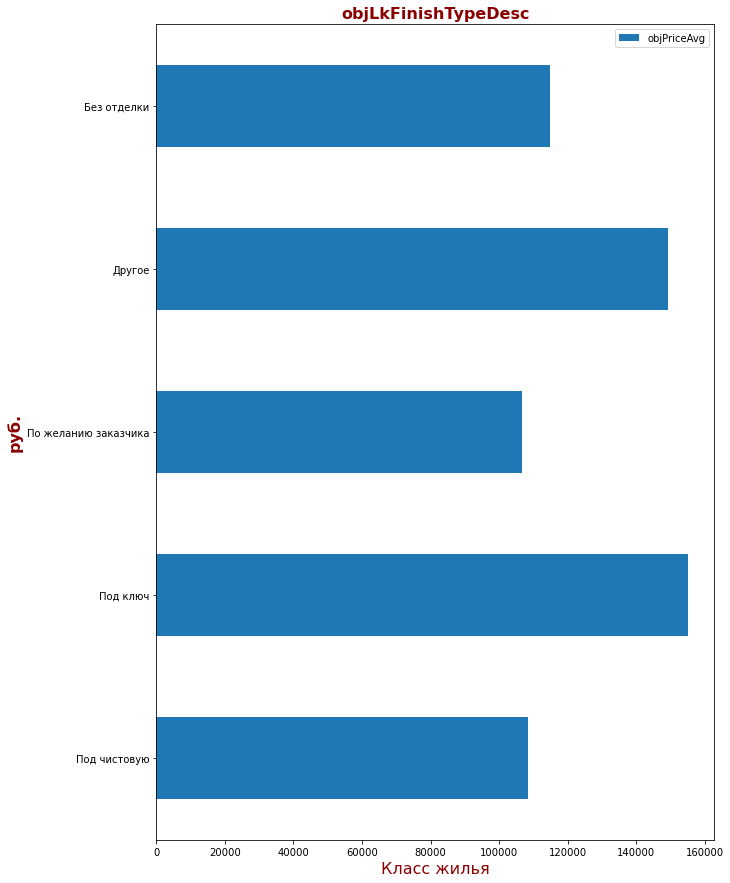

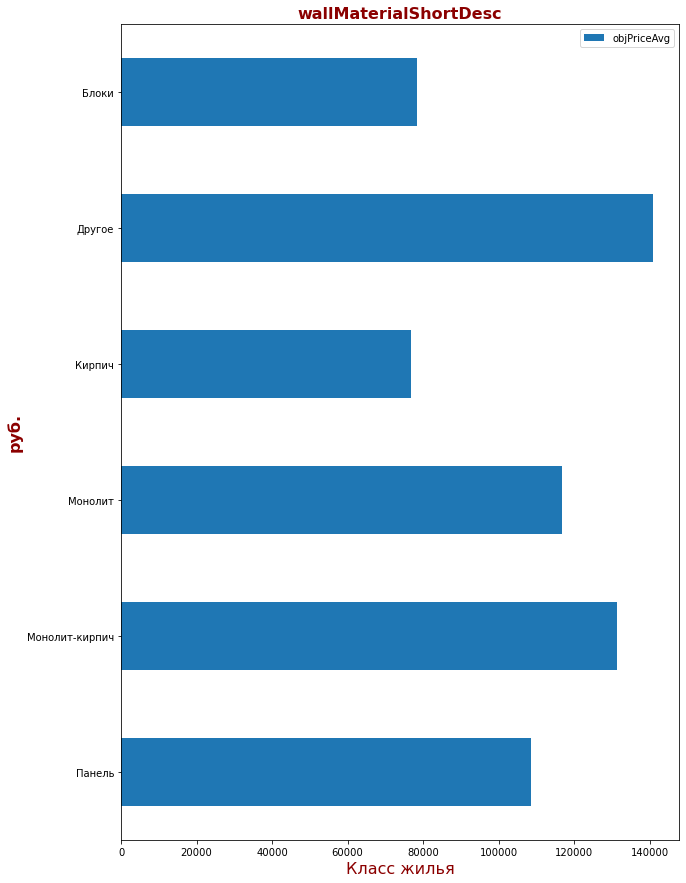

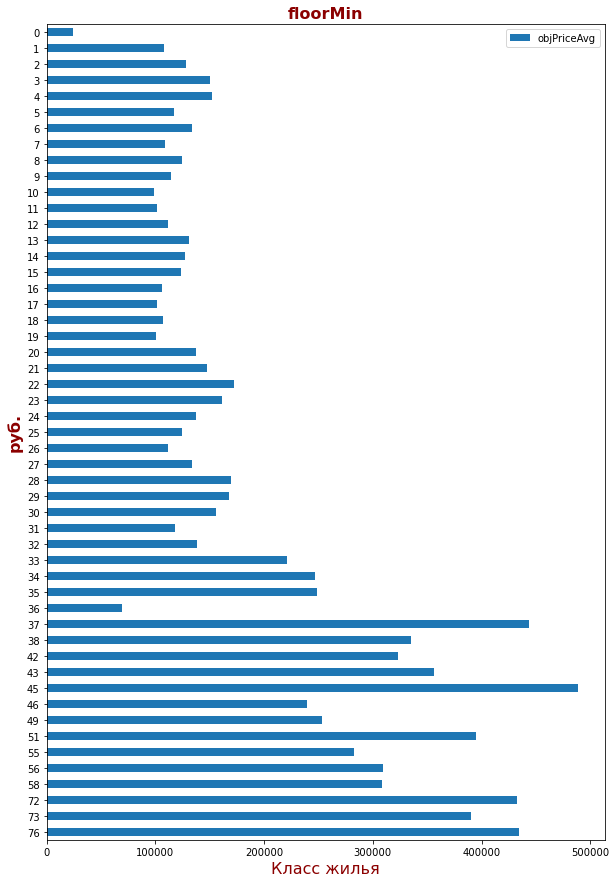

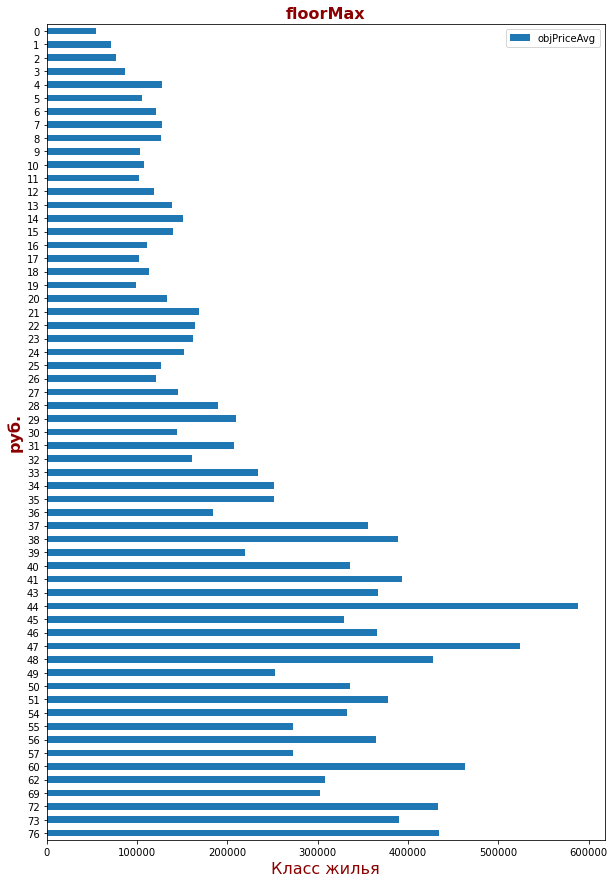

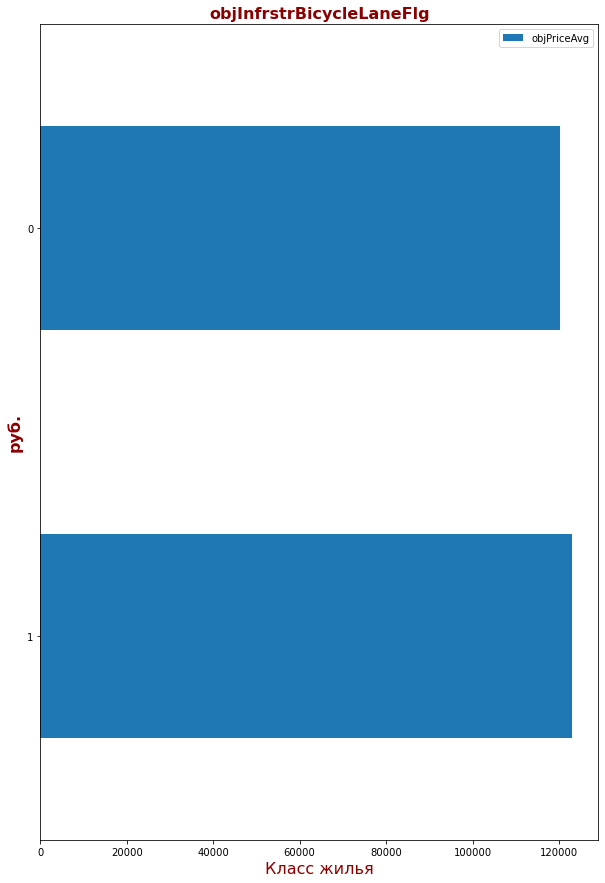

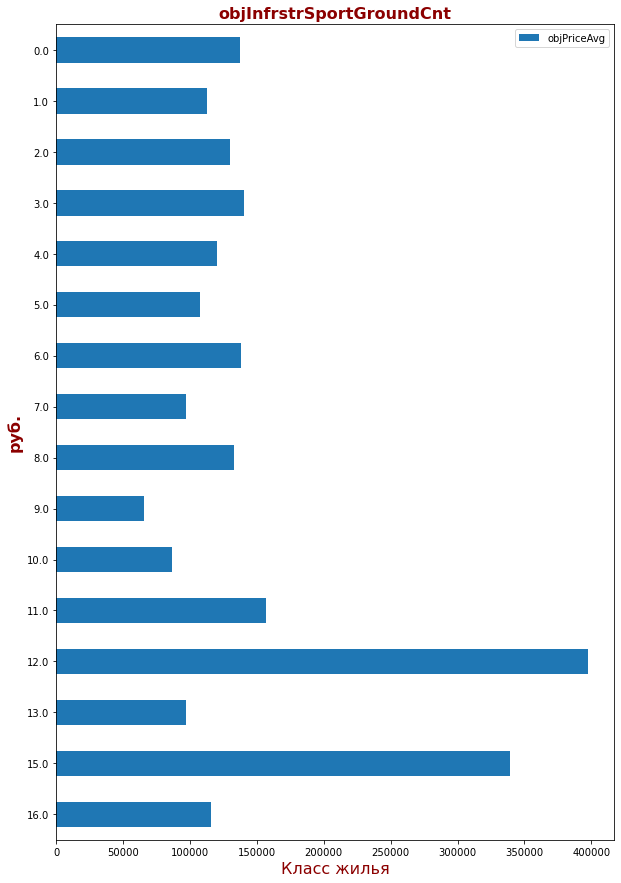

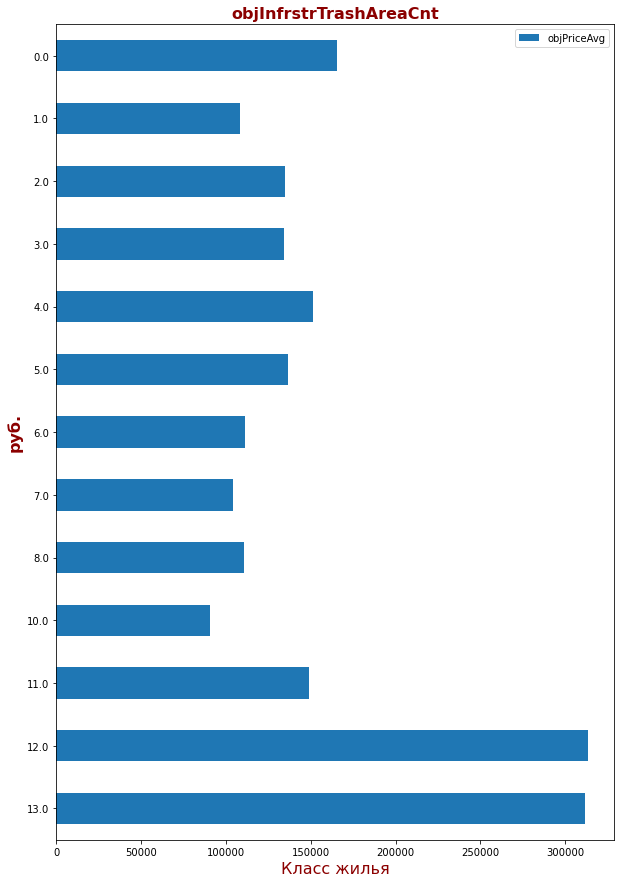

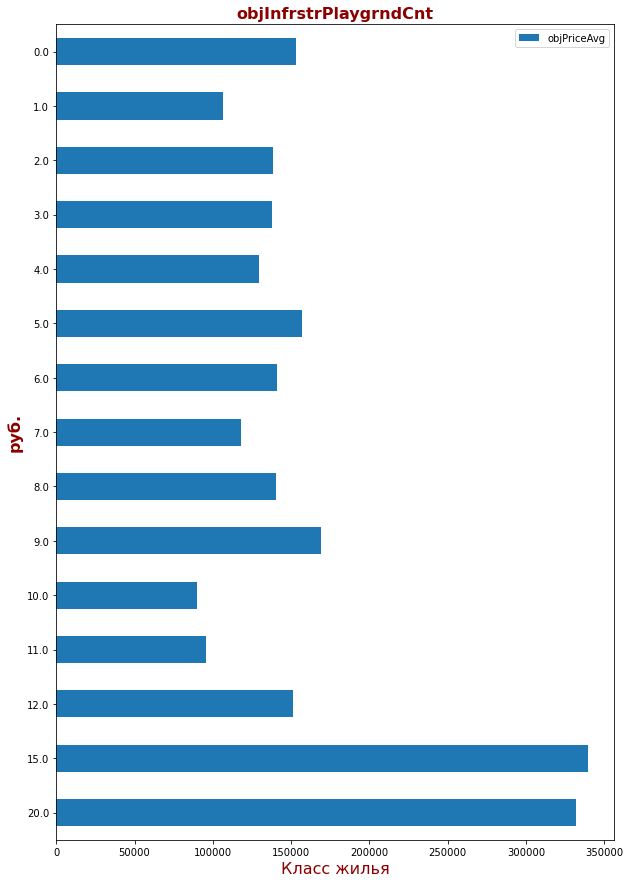

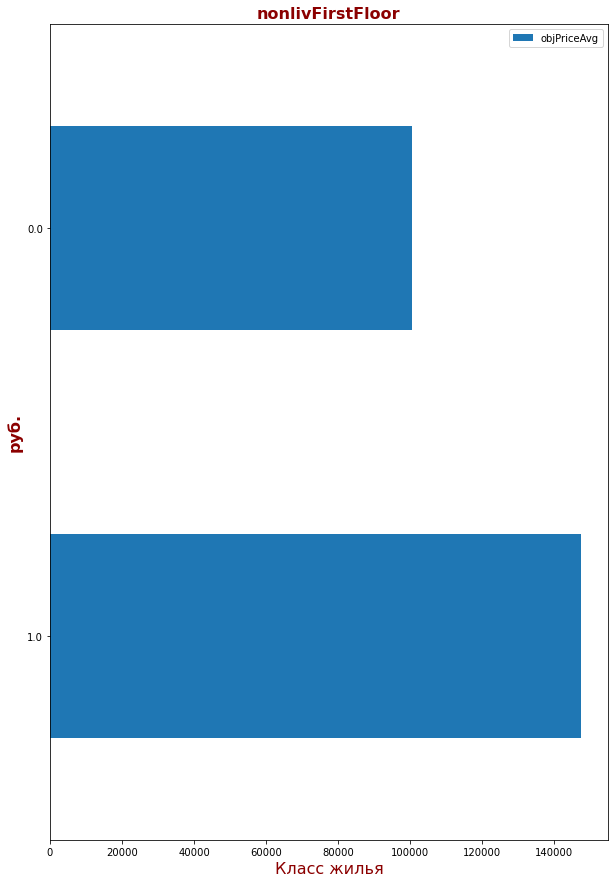

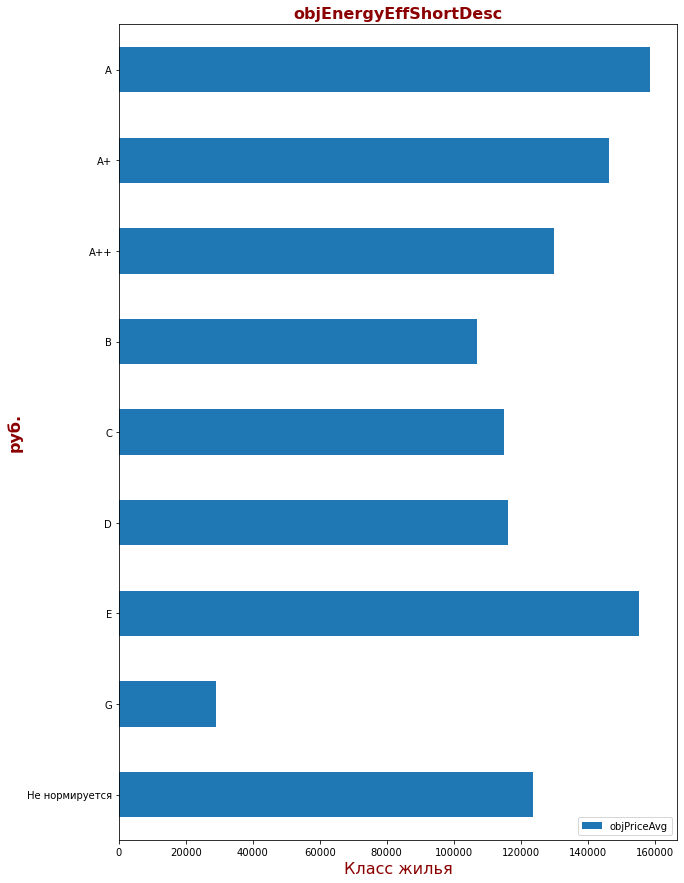

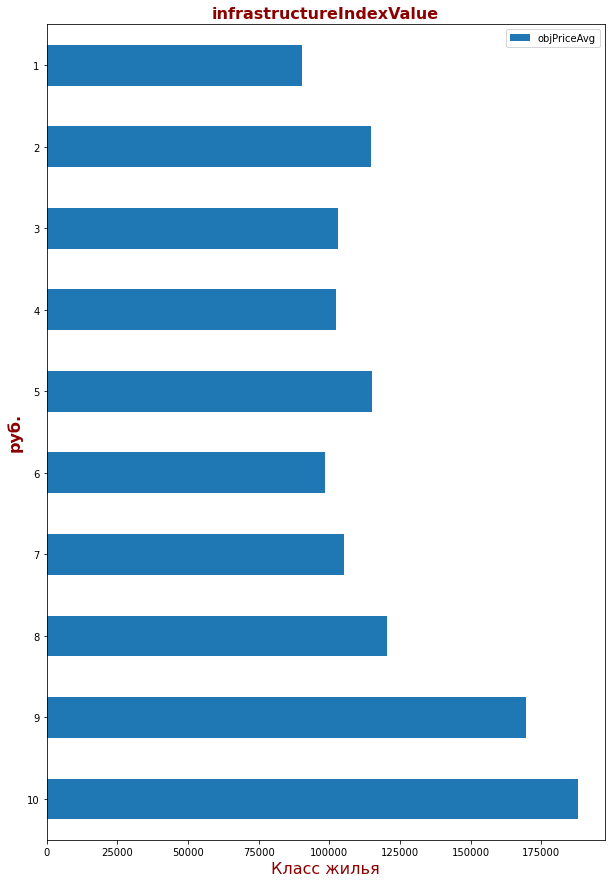

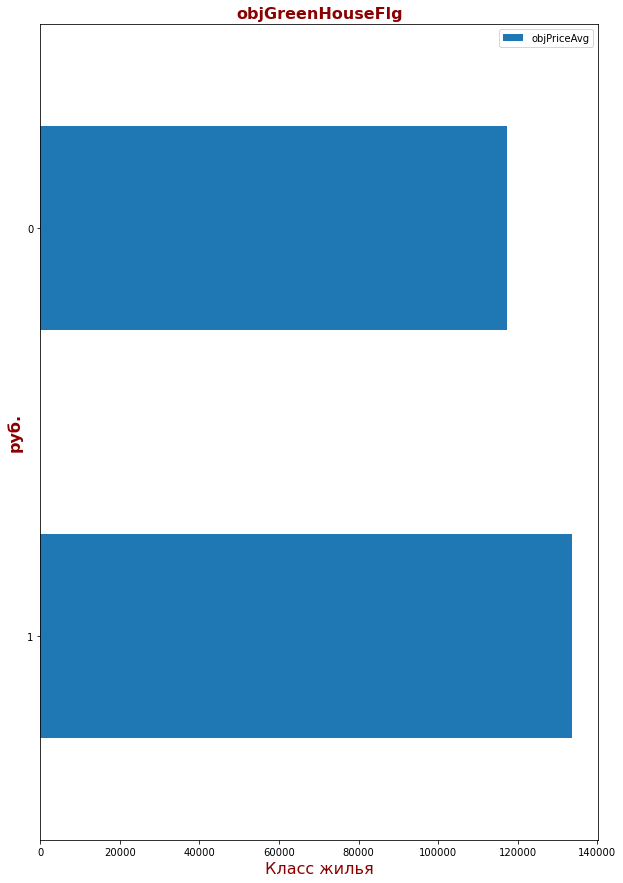

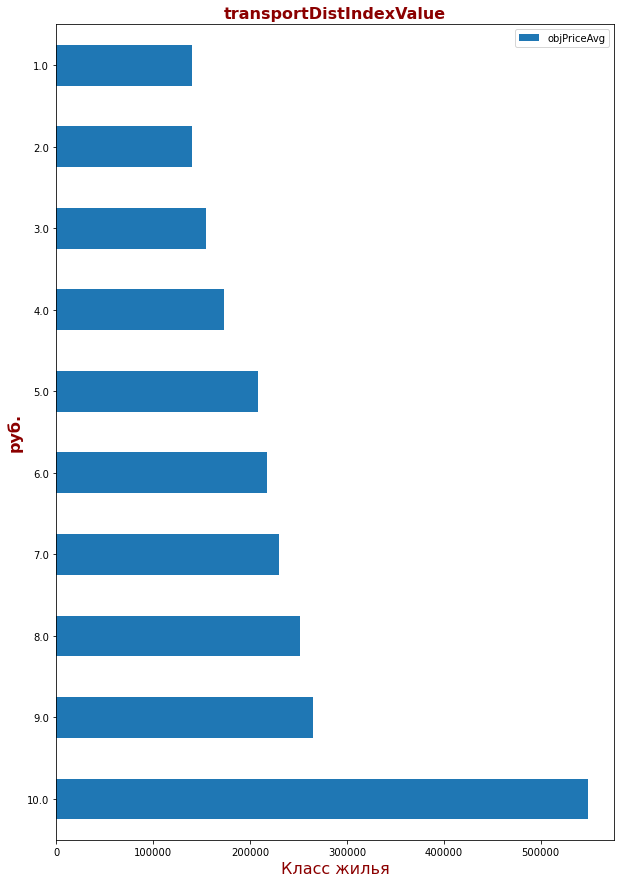

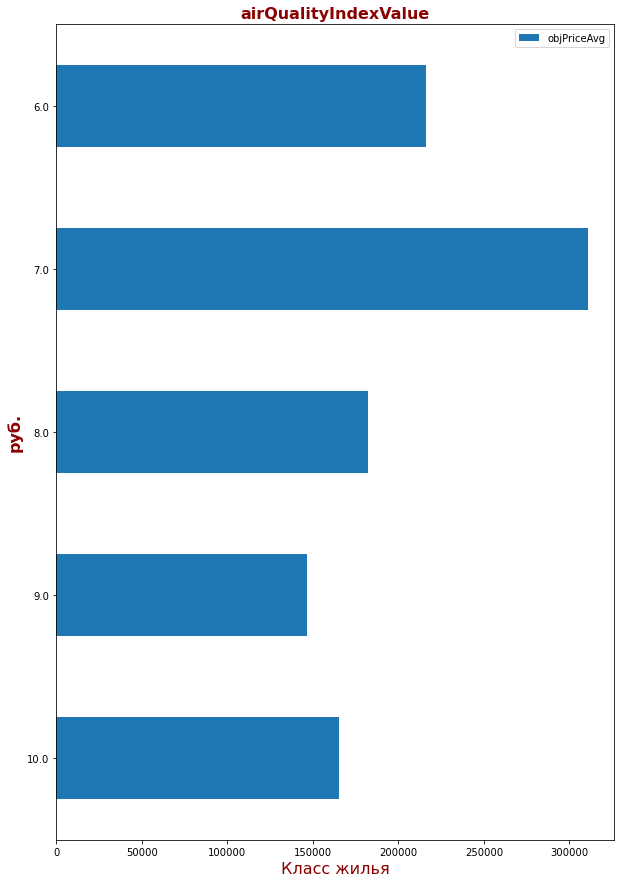

In [296]:
df2 = df[df['objPriceAvg'] > 0]
x1 = df2[['objLkFinishTypeDesc', 'objPriceAvg']].groupby('objLkFinishTypeDesc').mean('objPriceAvg')
x2 = df2[['wallMaterialShortDesc', 'objPriceAvg']].groupby('wallMaterialShortDesc').mean('objPriceAvg')
x3 = df2[['floorMin', 'objPriceAvg']].groupby('floorMin').mean('objPriceAvg')
x4 = df2[['floorMax', 'objPriceAvg']].groupby('floorMax').mean('objPriceAvg')
x5 = df2[['objInfrstrBicycleLaneFlg', 'objPriceAvg']].groupby('objInfrstrBicycleLaneFlg').mean('objPriceAvg')
x6 = df2[['objInfrstrSportGroundCnt', 'objPriceAvg']].groupby('objInfrstrSportGroundCnt').mean('objPriceAvg')
x7 = df2[['objInfrstrTrashAreaCnt', 'objPriceAvg']].groupby('objInfrstrTrashAreaCnt').mean('objPriceAvg')
x8 = df2[['objInfrstrPlaygrndCnt', 'objPriceAvg']].groupby('objInfrstrPlaygrndCnt').mean('objPriceAvg')
x9 = df2[['nonlivFirstFloor', 'objPriceAvg']].groupby('nonlivFirstFloor').mean('objPriceAvg')
x10 = df2[['objEnergyEffShortDesc', 'objPriceAvg']].groupby('objEnergyEffShortDesc').mean('objPriceAvg')
x11 = df2[['infrastructureIndexValue', 'objPriceAvg']].groupby('infrastructureIndexValue').mean('objPriceAvg')
x12 = df2[['objGreenHouseFlg', 'objPriceAvg']].groupby('objGreenHouseFlg').mean('objPriceAvg')
x13 = df2[['transportDistIndexValue', 'objPriceAvg']].groupby('transportDistIndexValue').mean('objPriceAvg')
x14 = df2[['airQualityIndexValue', 'objPriceAvg']].groupby('airQualityIndexValue').mean('objPriceAvg')
a = [(x1, 'objLkFinishTypeDesc', ''), (x2, 'wallMaterialShortDesc', ''), (x3, 'floorMin', ''), (x4, 'floorMax', ''), 
     (x5, 'objInfrstrBicycleLaneFlg', ''), (x6, 'objInfrstrSportGroundCnt', ''), (x7, 'objInfrstrTrashAreaCnt', ''), 
    (x8, 'objInfrstrPlaygrndCnt', ''), (x9, 'nonlivFirstFloor', ''), (x10, 'objEnergyEffShortDesc', ''), 
     (x11, 'infrastructureIndexValue', ''), (x12, 'objGreenHouseFlg', ''), (x13, 'transportDistIndexValue', ''), 
     (x14, 'airQualityIndexValue', '')]

for i in a:
    rcParams['figure.figsize'] = 10, 15
    i[0].sort_values(i[1], ascending=False).plot(kind='barh')
    plt.title(i[1], fontsize=16, fontweight='bold', color='DarkRed')
    plt.xlabel('Класс жилья', fontsize=16, color='DarkRed')
    plt.ylabel('руб.', fontsize=16, fontweight='bold', color='DarkRed')


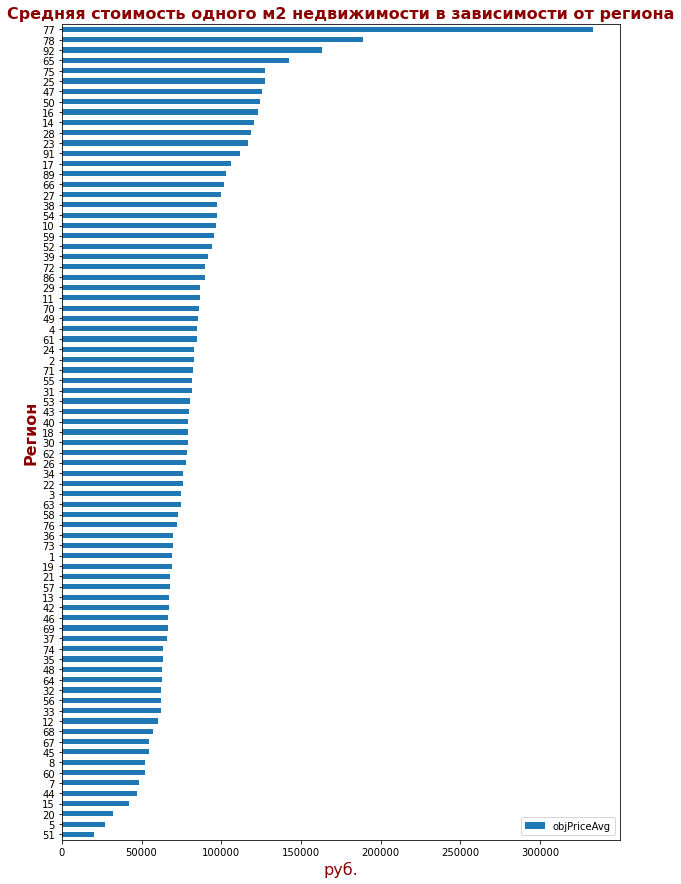

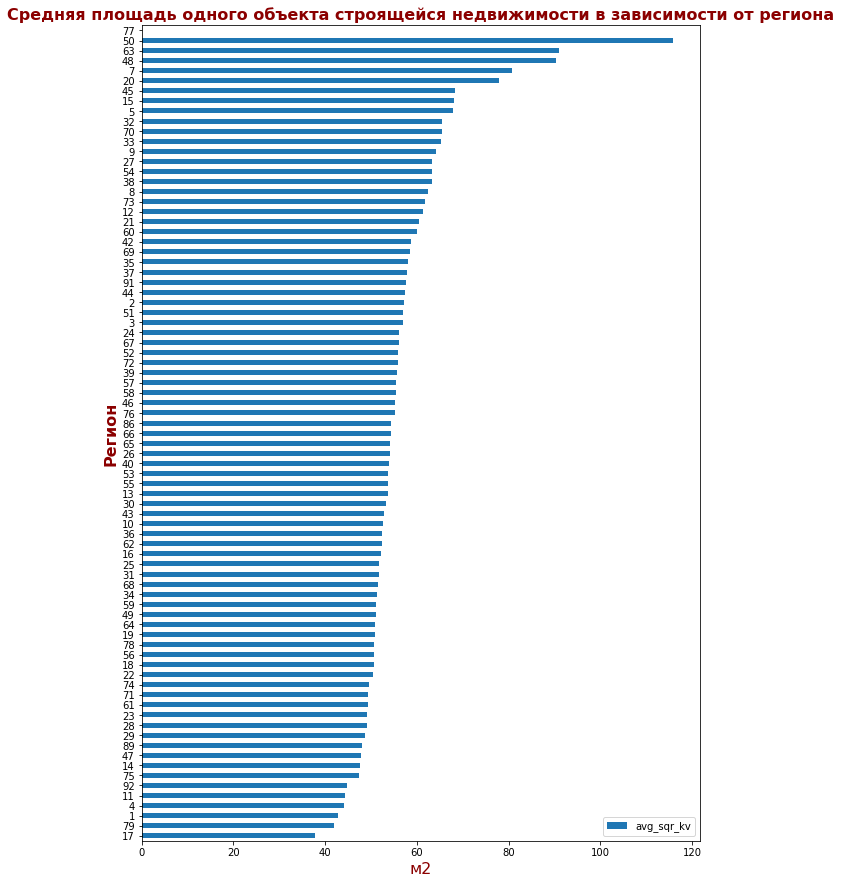

In [256]:
x = df[['region', 'objPriceAvg']][df['objPriceAvg'] > 0].groupby('region').mean('objPriceAvg')
x2 = df[['region', 'avg_sqr_kv']][df['avg_sqr_kv'] > 0].groupby('region').mean('avg_sqr_kv')
rcParams['figure.figsize'] = 10, 15
x.sort_values('objPriceAvg', ascending=True).plot(kind='barh')
plt.title('Средняя стоимость одного м2 недвижимости в зависимости от региона', fontsize=16, fontweight='bold', color='DarkRed')
plt.xlabel('руб.', fontsize=16, color='DarkRed')
plt.ylabel('Регион', fontsize=16, fontweight='bold', color='DarkRed')
x2.sort_values('avg_sqr_kv', ascending=True).plot(kind='barh')
plt.title('Средняя площадь одного объекта строящейся недвижимости в зависимости от региона', fontsize=16, fontweight='bold', color='DarkRed')
plt.xlabel('м2', fontsize=16, color='DarkRed')
plt.ylabel('Регион', fontsize=16, fontweight='bold', color='DarkRed')
plt.show()

In [ ]:
'objPriceAvg'

In [ ]:
df['Year_ready'] = [int(i[:4]) for i in df['objReady100PercDt']]
df['avg_sqr_kv'] = df['objSquareLiving'] // df['objElemLivingCnt']


In [145]:
df['Year_ready'] = [int(i[:4]) for i in df['objReady100PercDt']]

In [197]:
df['avg_sqr_kv'] = df['objSquareLiving'] // df['objElemLivingCnt']

In [238]:
df2 = df[df['avg_sqr_kv'] > 0]

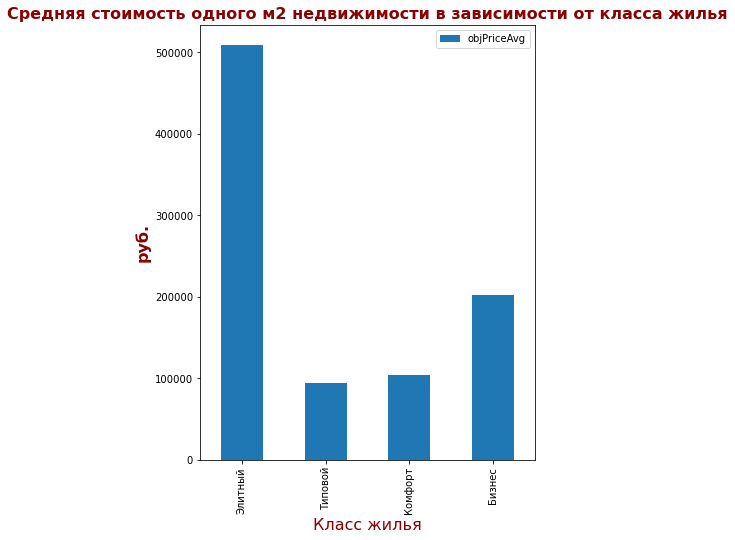

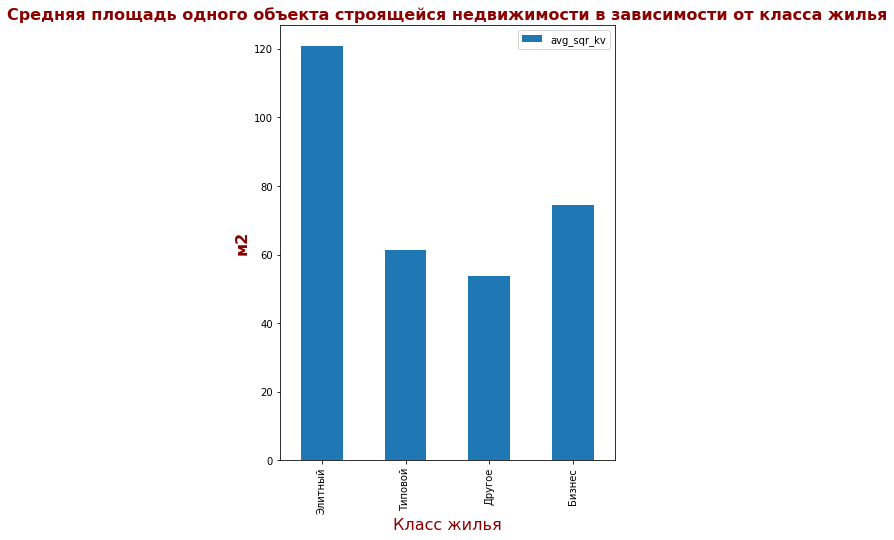

In [250]:
x = df[['objLkClassDesc', 'objPriceAvg']][df['objLkClassDesc'] != 'Другое'].groupby('objLkClassDesc').mean('objPriceAvg')
x2 = df[['objLkClassDesc', 'avg_sqr_kv']][df['objLkClassDesc'] != 'Комфорт'].groupby('objLkClassDesc').mean('avg_sqr_kv')

rcParams['figure.figsize'] = 6, 8
x.sort_values('objLkClassDesc', ascending=False).plot(kind='bar')
plt.title('Средняя стоимость одного м2 недвижимости в зависимости от класса жилья', fontsize=16, fontweight='bold', color='DarkRed')
plt.xlabel('Класс жилья', fontsize=16, color='DarkRed')
plt.ylabel('руб.', fontsize=16, fontweight='bold', color='DarkRed')
x2.sort_values('objLkClassDesc', ascending=False).plot(kind='bar')
plt.title('Средняя площадь одного объекта строящейся недвижимости в зависимости от класса жилья', fontsize=16, fontweight='bold', color='DarkRed')
plt.xlabel('Класс жилья', fontsize=16, color='DarkRed')
plt.ylabel('м2', fontsize=16, fontweight='bold', color='DarkRed')
plt.show()

In [201]:
x = df2[['Year_ready', 'objPriceAvg']].groupby('Year_ready').mean('objPriceAvg')
x

,objPriceAvg
Year_ready,
2017,32502.000000
2018,NaN
2019,NaN
2020,38049.857143
2021,41584.533333
2022,89845.586424
2023,106980.351433
2024,137233.720680
2025,154519.589398


In [205]:
x2 = df2[['Year_ready', 'avg_sqr_kv']][df2['Year_ready'] != 2017].groupby('Year_ready').mean('avg_sqr_kv')
x2

,avg_sqr_kv
Year_ready,
2018,21.142857
2019,38.500000
2020,45.977273
2021,50.740000
2022,NaN
2023,56.734075
2024,56.561795
2025,52.338172
2026,53.172414


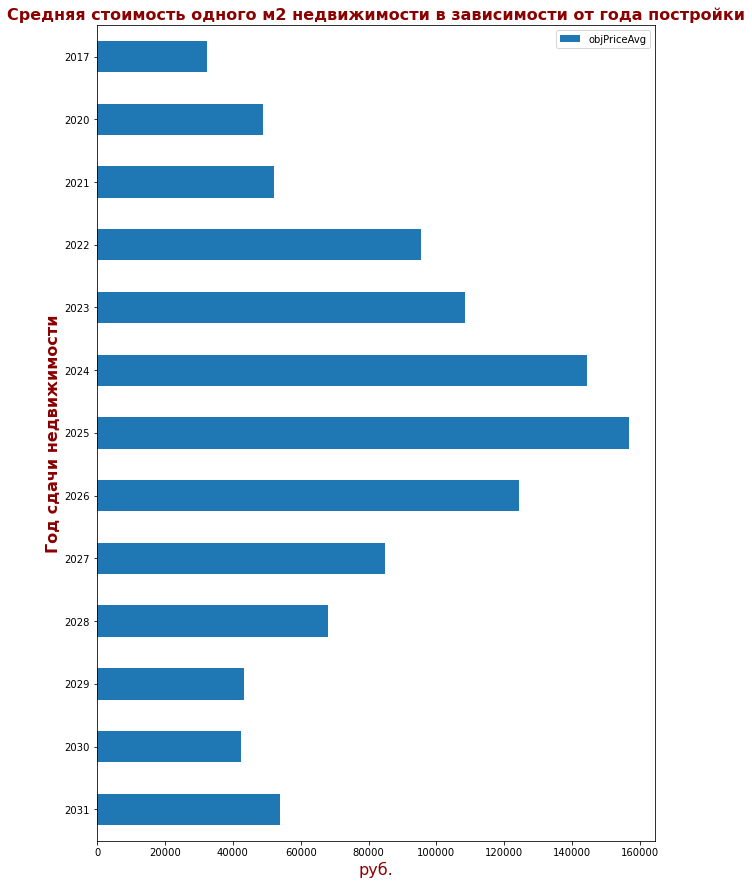

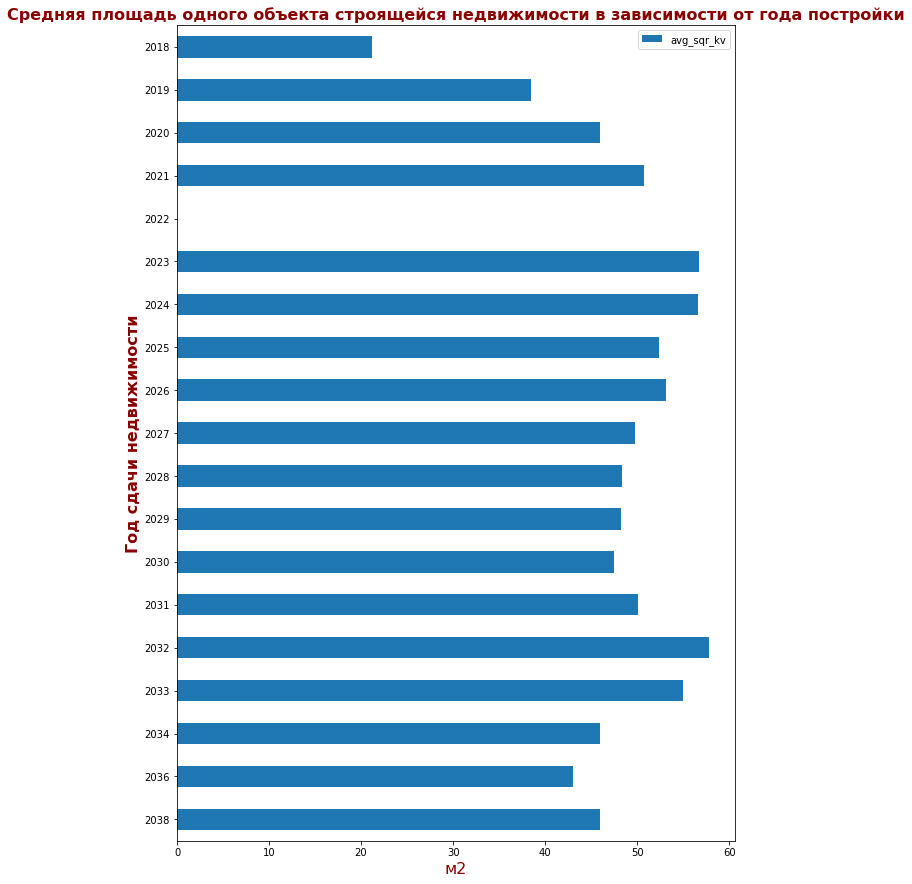

In [254]:
x = df[['Year_ready', 'objPriceAvg']][df['objPriceAvg'] > 0].groupby('Year_ready').mean('objPriceAvg')
x2 = df[['Year_ready', 'avg_sqr_kv']][(df['Year_ready'] != 2017) & df['avg_sqr_kv'] > 0].groupby('Year_ready').mean('avg_sqr_kv')

rcParams['figure.figsize'] = 10,15
x.sort_values('Year_ready', ascending=False).plot(kind='barh')
plt.title('Средняя стоимость одного м2 недвижимости в зависимости от года постройки', fontsize=16, fontweight='bold', color='DarkRed')
plt.xlabel('руб.', fontsize=16, color='DarkRed')
plt.ylabel('Год сдачи недвижимости', fontsize=16, fontweight='bold', color='DarkRed')
x2.sort_values('Year_ready', ascending=False).plot(kind='barh')
plt.title('Средняя площадь одного объекта строящейся недвижимости в зависимости от года постройки', fontsize=16, fontweight='bold', color='DarkRed')
plt.xlabel('м2', fontsize=16, color='DarkRed')
plt.ylabel('Год сдачи недвижимости', fontsize=16, fontweight='bold', color='DarkRed')
plt.show()

In [176]:
df2

,id,hobjId,pdId,region,address,floorMin,floorMax,objElemLivingCnt,objReady100PercDt,wallMaterialShortDesc,...,metro,transportDistIndex,transportDistIndexValue,airQualityIndexValue,bankruptStage,orgBankruptMsgDttm,complexShortNm,greenAreaIndexValue,Year_ready,avg_sqr_kv
0,13383,39024,28105,72,г Тюмень,4,20,68,2023-03-31,Другое,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023,92
1,13398,37165,28141,72,"г Тюмень, ул Профсоюзная, д. 56",7,10,43,2024-12-31,Другое,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024,111
2,13397,37201,28141,72,"г Тюмень, ул Профсоюзная, д. 56",6,12,65,2024-12-31,Другое,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024,96
4,36912,117248,337586,26,"г Ставрополь, ул Шпаковская, Доваторцев, д. 10...",2,10,104,2022-12-31,Монолит-кирпич,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,79
5,10891,6541,23054,35,"г Вологда, ул Медуницинская, д. 7",16,16,225,2023-03-31,Панель,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34471,28071,19791,99284,50,"г Котельники, район мкр.Ковровый, д.1-5, 24-29...",26,26,288,2024-06-30,Другое,...,"{'id': '7.508', 'name': 'Котельники', 'line': ...",NaN,NaN,8.0,NaN,NaN,NaN,NaN,2024,51
34472,28070,19242,99487,50,"г Котельники, район мкр.Ковровый, д.1-5, 24-29...",2,26,768,2025-03-31,Другое,...,"{'id': '7.508', 'name': 'Котельники', 'line': ...",NaN,NaN,7.0,NaN,NaN,NaN,NaN,2025,38
34473,28073,19245,96446,50,"г Котельники, район мкр.Ковровый, д.1-5, 24-29...",26,26,312,2024-06-30,Другое,...,"{'id': '7.508', 'name': 'Котельники', 'line': ...",NaN,NaN,8.0,NaN,NaN,NaN,NaN,2024,47
34474,44447,125044,475093,76,"г Ярославль, Фрунзенский район, территория в р...",6,6,127,2022-12-31,Кирпич,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,53


In [164]:
df[['Year_ready', 'objSquareLiving']].groupby('Year_ready').sum('objSquareLiving')

,objSquareLiving
Year_ready,
2017,1.280616e+05
2018,1.003236e+05
2019,9.693580e+03
2020,3.700552e+05
2021,1.754418e+05
2022,2.720430e+07
2023,1.193108e+08
2024,9.907566e+07
2025,5.755451e+07


In [165]:
x2 = df[['Year_ready', 'objSquareLiving']].groupby('Year_ready').mean('objSquareLiving')

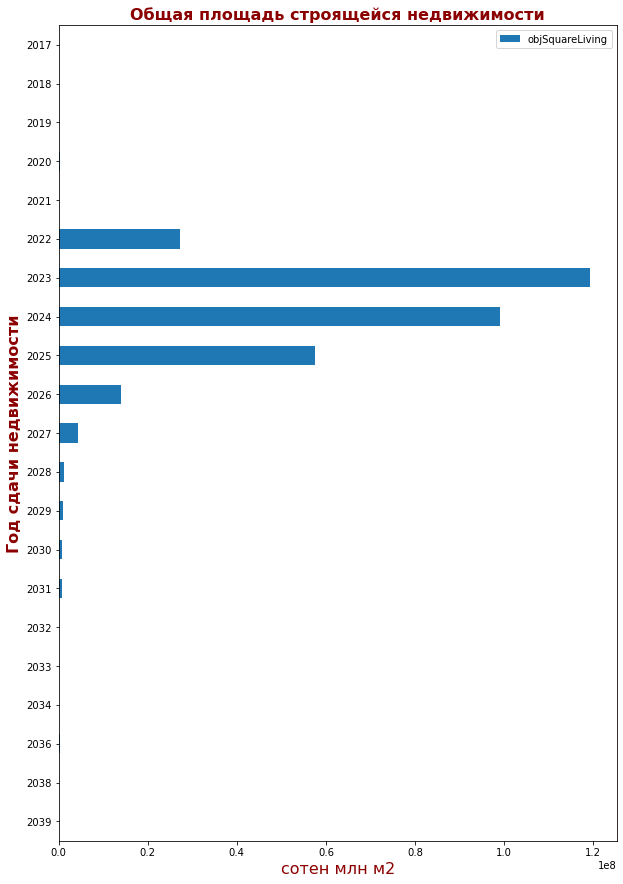

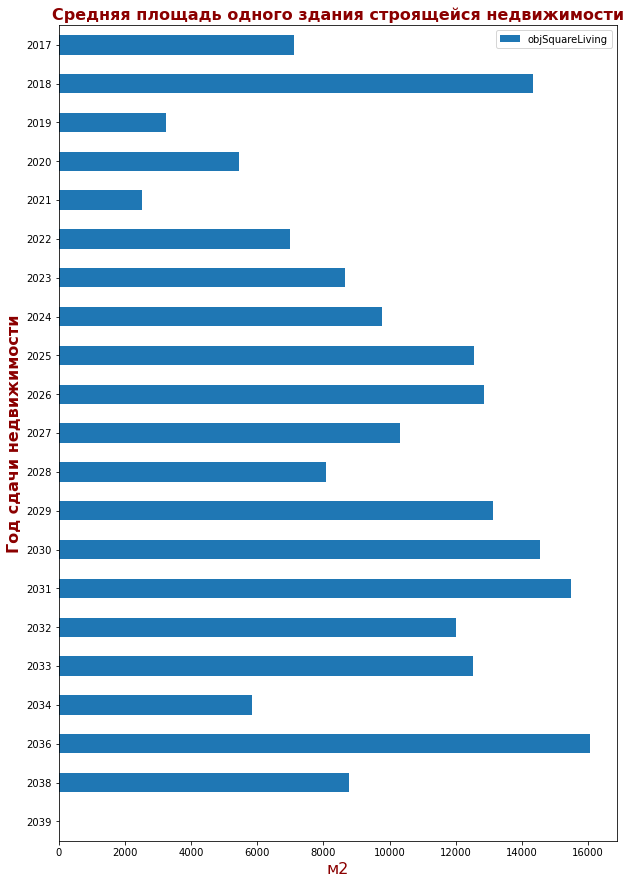

In [285]:
x = df[['Year_ready', 'objSquareLiving']].groupby('Year_ready').sum('objSquareLiving')
x2 = df[['Year_ready', 'objSquareLiving']].groupby('Year_ready').mean('objSquareLiving')

rcParams['figure.figsize'] = 10,15
x.sort_values('Year_ready', ascending=False).plot(kind='barh')
plt.title('Общая площадь строящейся недвижимости', fontsize=16, fontweight='bold', color='DarkRed')
plt.xlabel('сотен млн м2', fontsize=16, color='DarkRed')
plt.ylabel('Год сдачи недвижимости', fontsize=16, fontweight='bold', color='DarkRed')
x2.sort_values('Year_ready', ascending=False).plot(kind='barh')
plt.title('Средняя площадь одного здания строящейся недвижимости', fontsize=16, fontweight='bold', color='DarkRed')
plt.xlabel('м2', fontsize=16, color='DarkRed')
plt.ylabel('Год сдачи недвижимости', fontsize=16, fontweight='bold', color='DarkRed')
plt.show()

# И только вот на этом моменте нашёл, что там были названия регионов...

# А дальше выполнил ООП...

In [146]:
df.groupby

,id,hobjId,pdId,region,address,floorMin,floorMax,objElemLivingCnt,objReady100PercDt,wallMaterialShortDesc,...,nameObj,metro,transportDistIndex,transportDistIndexValue,airQualityIndexValue,bankruptStage,orgBankruptMsgDttm,complexShortNm,greenAreaIndexValue,Year_ready
0,13383,39024,28105,72,г Тюмень,4,20,68,2023-03-31,Другое,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023
1,13398,37165,28141,72,"г Тюмень, ул Профсоюзная, д. 56",7,10,43,2024-12-31,Другое,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024
2,13397,37201,28141,72,"г Тюмень, ул Профсоюзная, д. 56",6,12,65,2024-12-31,Другое,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024
3,13399,34754,28141,72,"г Тюмень, ул Профсоюзная, д. 56",1,1,0,2024-12-31,Другое,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024
4,36912,117248,337586,26,"г Ставрополь, ул Шпаковская, Доваторцев, д. 10...",2,10,104,2022-12-31,Монолит-кирпич,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34471,28071,19791,99284,50,"г Котельники, район мкр.Ковровый, д.1-5, 24-29...",26,26,288,2024-06-30,Другое,...,"Жилой комплекс""Томилинский бульвар""","{'id': '7.508', 'name': 'Котельники', 'line': ...",NaN,NaN,8.0,NaN,NaN,NaN,NaN,2024
34472,28070,19242,99487,50,"г Котельники, район мкр.Ковровый, д.1-5, 24-29...",2,26,768,2025-03-31,Другое,...,"Жилой комплекс""Томилинский бульвар""","{'id': '7.508', 'name': 'Котельники', 'line': ...",NaN,NaN,7.0,NaN,NaN,NaN,NaN,2025
34473,28073,19245,96446,50,"г Котельники, район мкр.Ковровый, д.1-5, 24-29...",26,26,312,2024-06-30,Другое,...,"Жилой комплекс""Томилинский бульвар""","{'id': '7.508', 'name': 'Котельники', 'line': ...",NaN,NaN,8.0,NaN,NaN,NaN,NaN,2024
34474,44447,125044,475093,76,"г Ярославль, Фрунзенский район, территория в р...",6,6,127,2022-12-31,Кирпич,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022
